# breast cancer prediction with Adboost

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

### Read data

In [66]:
# data source : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
data = pd.read_csv('./data/breast_cancer/data.csv')
print(data.head(2))

data.shape

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN

(569, 33)

### Analyze data 

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean'],
      dtype='object')


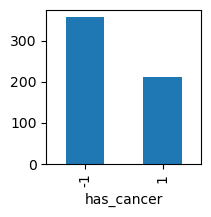

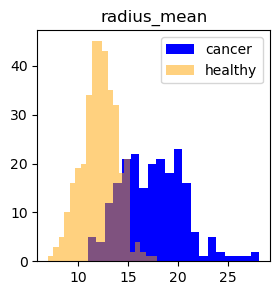

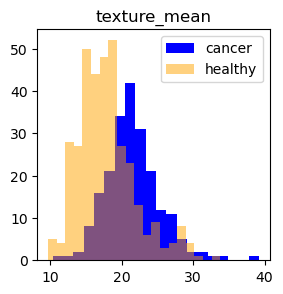

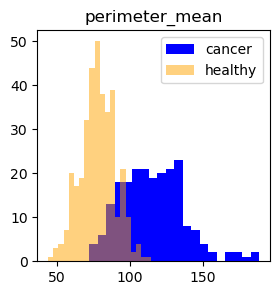

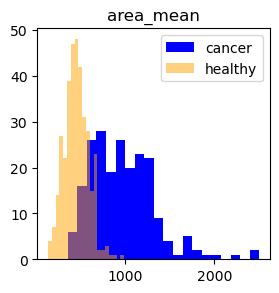

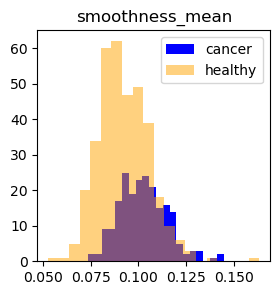

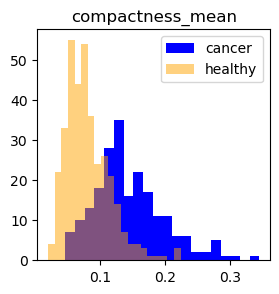

In [67]:
# plot to see the relationship between cancer and features
label_column = 'has_cancer'
data['has_cancer'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else -1)
data['has_cancer'].value_counts().plot(kind='bar', figsize=(2, 2))

features = data.columns[2:8]
print(features)

for feature in features:
    plt.figure(figsize=(3, 3))
    plt.hist(data[data[label_column] == 1][feature], bins=20, color='blue', alpha =1, label='cancer')
    plt.hist(data[data[label_column] == -1][feature], bins=20, color='orange', alpha =0.5, label='healthy')
    plt.title(feature)
    plt.legend()
    plt.show()
    

In [68]:
Y = data[label_column]
data.drop(['Unnamed: 32','id', 'diagnosis', label_column], axis=1, inplace=True, errors='ignore')

### Train model

In [69]:
data.info

train_x, valid_x, train_y, valid_y = train_test_split(data, Y, test_size=0.2, random_state=0)

### Evaluate logestic model

In [70]:
logistic_model = LogisticRegression(max_iter=100)
score1 = cross_val_score(logistic_model, train_x, train_y, cv=3)
print('logistic model score:', score1.mean())

decision_tree = DecisionTreeClassifier(max_depth=4)
score2 = cross_val_score(decision_tree, train_x, train_y, cv=3)
print('decision_tree score:', score2.mean())

adboost = AdaBoostClassifier(n_estimators=10)
score3 = cross_val_score(adboost, train_x, train_y, cv=3)
print('decision_tree score:', score3.mean())

c:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

logistic model score: 0.9429098408272337
decision_tree score: 0.9098989194841408
decision_tree score: 0.9493871267572906


## Manual implemententation of Ada boost

In [88]:
# fit
    # pick model number
        # initial sample
        # sample weight
        # pick a feature
        # train current model
        # calculate model weight
        # update sample weight weight

# predict 
    # get the weighted predictions of all the models
from sklearn.base import BaseEstimator
class MyAdaBoostClassifier(BaseEstimator):
    def __init__(self, N = 10):
        self.N = N
        self.models = []
        self.model_weights = []

    def fit(self, X, y):
        sample_weights = np.ones(len(X))
        sample_weights = sample_weights / len(X)
        
        for i in range(self.N):
            model = DecisionTreeClassifier(max_depth=2)
            model.fit(X, y)
            y_pred = model.predict(X)
            # calculate new model weight
            weighted_error_rate = sample_weights.dot(y_pred != y)         
            model_weight = 0.5 * np.log((1- weighted_error_rate)/ weighted_error_rate)
            new_sample_weights = sample_weights* np.exp(-model_weight * y_pred * y )
            sample_weights = new_sample_weights/new_sample_weights.sum()
            # print(model.feature_importances_)
            self.models.append(model)
            self.model_weights.append(model_weight)  
            
    def predict(self, X):
        result = np.zeros(len(X))
        for i in range(self.N):
            result += self.model_weights[i] * self.models[i].predict(X)
        return np.sign(result)

    def score(self, X, y):        
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

my_adboost = MyAdaBoostClassifier(N=30)
score4 = cross_val_score(my_adboost, train_x, train_y, cv=6)
print('my_adboost score:', score4.mean())

my_adboost score: 0.918654970760234
